# Analysis on top 500 companies from Ambition Box


In [1]:
url = "https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav"

In [603]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Web scraping

In [3]:
requests.get(url)

<Response [403]>

In [7]:
headers={ "User-Agent": "nicrosoft Edge/112.0.1722.39", 

        "Accept-Language" : "en-US,en;q=0.5",

        "Accept-Encoding" : "gzip, deflate, br",

        "Connection": "keep-alive",

        }

In [5]:
#request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36','Accept-Encoding': 'gzip, deflate, br'}

In [8]:
page  = requests.get(url,headers = headers)

In [9]:
page

<Response [200]>

In [55]:
soup = BeautifulSoup(page.text)

In [558]:
Rating = []
no_Reviews = []
salary = []
company = []
ages = []
Location = []
Industry = []
Jobs = []
Rated_for = []
Critically_rated = []

for i in range(1,21):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={i}"
    #print(url)
    page  = requests.get(url,headers = headers)
    soup = BeautifulSoup(page.text)

    for i in soup.find_all("div",class_="companyCardWrapper"):

        #rating
        rating = i.find("div",class_="companyCardWrapper__companyRatingWrapper")
        if rating:
            rating = rating.text
            regex = re.findall(r"\d+\.\d+", rating)
            if regex:
                Rating.append(regex[0])
            else:
                Rating.append(np.nan)
    
        #rating_reviews
        rating_reviews = i.find("div",class_="companyCardWrapper__tertiaryInformation")

        if rating_reviews:
            no_reviews = re.findall("(.+)k\sReviews",rating_reviews.text)
            if no_reviews:
                no_Reviews.append(no_reviews[0])
            else:
                no_Reviews.append(np.nan)
            
        #rating_salaries  
        no_salaries = re.findall(r"\d+(?:\.\d+)?[Lk](?=\sSalaries)", rating_reviews.text)
        if no_salaries:
            salary.append(no_salaries[0])
        else:
            salary.append(np.nan)
        
           
        #company name
        company_name = i.find("div",class_="companyCardWrapper__companyPrimaryDetailsTopSection")
        if company_name:
            company_name = re.findall("\w+",company_name.text)
            company_name = " ".join(word for word in company_name if word != "Follow")
            if company_name:
                company.append(company_name)
            else:
                company.append(np.nan)
   
        #age
        age = i.find("span", class_="companyCardWrapper__interLinking")
        if age:
            extracted_ages = re.findall(r"\b(\d+)\s+years\s+old\b", age.text)
            if extracted_ages:
                ages.append(extracted_ages[0])
            else:
                ages.append(np.nan)
        else:
            ages.append(np.nan)
        
        #location  
        location = i.find("span", class_="companyCardWrapper__interLinking")
        if location:
            extracted_location = re.findall(r"(\b[A-Za-z]+(?:[\.\,]?[A-Za-z]+)*\b)(?=\s\+\d+\smore)",location.text)

            if extracted_location:
                Location.append(extracted_location[0])
            else:
                Location.append(np.nan)
        else:
            Location.append(np.nan)
        
        #industry 
        industry = i.find("span", class_="companyCardWrapper__interLinking")

        if industry:
            extracted_industry = re.findall(r"^([A-Za-z&\s]+)(?=\s\|)", industry.text)

            extracted_industry = [industry.strip() for industry in extracted_industry]

            if extracted_industry:
                Industry.append(extracted_industry[0])  
            else:
                Industry.append(np.nan)
        else:
            Industry.append(np.nan)
        
        #highly rated for 
        rated_for = i.find("span", class_="companyCardWrapper__ratingValues")

        if rated_for:
            rated_for = rated_for.text.strip()

            rated_for = rated_for.split(',' or '/')

        if rated_for:
            Rated_for.append(rated_for[0])  
        else:
            Rated_for.append(np.nan) 
        
        #critically rated for
        critically_rated = i.find("div", class_="companyCardWrapper__ratingComparisonWrapper")

        if critically_rated:
            critically_rated = re.findall(r"Critically Rated For (.+?)\s*(?=\n|$|,|$)",critically_rated.text)

            if critically_rated:

                Critically_rated.append(critically_rated[0])
            else:
                Critically_rated.append(np.nan)
        else:
            Critically_rated.append(np.nan)


In [559]:
d = {"Company":company,"Industry":Industry,"Age":ages, "Rating":Rating,"Reviews":no_Reviews, "Salary":salary, "Location":Location,"Highly Rated":Rated_for,"Critically Rated":Critically_rated}



In [561]:
data = pd.DataFrame(d)

In [562]:
data

,Company,Industry,Age,Rating,Reviews,Salary,Location,Highly Rated,Critically Rated
0,TCS,IT Services & Consulting,56,3.7,82.9,9L,Mumbai,Job Security,Promotions / Appraisal
1,Accenture,IT Services & Consulting,35,3.9,51.7,6L,Dublin,Company Culture,Promotions / Appraisal
2,Cognizant,IT Services & Consulting,30,3.8,46.5,5.9L,NaN,Promotions / Appraisal,Promotions / Appraisal
3,Wipro,IT Services & Consulting,79,3.7,46.4,4.5L,Bengaluru,Job Security,Promotions / Appraisal
4,Capgemini,IT Services & Consulting,57,3.8,38.3,4.4L,Paris,Job Security,Promotions / Appraisal
...,...,...,...,...,...,...,...,...,...
395,Sobha,Real Estate,29,3.9,1.7,7.9k,Bengaluru,Job Security,Promotions / Appraisal
396,Whirlpool,Consumer Electronics & Appliances,113,4.1,1.7,7.7k,Michigan,Work Life Balance,Promotions / Appraisal
397,RMSI,IT Services & Consulting,32,3.6,1.7,7.8k,Noida,Promotions / Appraisal,Promotions / Appraisal
398,IntouchCX,BPO,23,3.0,1.7,7.8k,Winnipeg,Promotions / Appraisal,Promotions / Appraisal


In [563]:
file_path = r"C:\Users\HP\Downloads\New fold\output.csv"

data.to_csv(file_path, index=False)


In [564]:
#reading CSV into dataframe

data1= pd.read_csv(r"C:\Users\HP\Downloads\New fold\output.csv")

In [590]:
data1

,Company,Industry,Age,Rating,Reviews,Salary,Location,Highly Rated,Critically Rated
0,TCS,IT Services & Consulting,56.0,3.7,82.9,9L,Mumbai,Job Security,Promotions / Appraisal
1,Accenture,IT Services & Consulting,35.0,3.9,51.7,6L,Dublin,Company Culture,Promotions / Appraisal
2,Cognizant,IT Services & Consulting,30.0,3.8,46.5,5.9L,NaN,Promotions / Appraisal,Promotions / Appraisal
3,Wipro,IT Services & Consulting,79.0,3.7,46.4,4.5L,Bengaluru,Job Security,Promotions / Appraisal
4,Capgemini,IT Services & Consulting,57.0,3.8,38.3,4.4L,Paris,Job Security,Promotions / Appraisal
...,...,...,...,...,...,...,...,...,...
395,Sobha,Real Estate,29.0,3.9,1.7,7.9k,Bengaluru,Job Security,Promotions / Appraisal
396,Whirlpool,Consumer Electronics & Appliances,113.0,4.1,1.7,7.7k,Michigan,Work Life Balance,Promotions / Appraisal
397,RMSI,IT Services & Consulting,32.0,3.6,1.7,7.8k,Noida,Promotions / Appraisal,Promotions / Appraisal
398,IntouchCX,BPO,23.0,3.0,1.7,7.8k,Winnipeg,Promotions / Appraisal,Promotions / Appraisal


In [591]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           400 non-null    object 
 1   Industry          368 non-null    object 
 2   Age               391 non-null    float64
 3   Rating            400 non-null    float64
 4   Reviews           400 non-null    float64
 5   Salary            399 non-null    object 
 6   Location          399 non-null    object 
 7   Highly Rated      397 non-null    object 
 8   Critically Rated  245 non-null    object 
dtypes: float64(3), object(6)
memory usage: 28.2+ KB


In [714]:
#spliting the salary column into figure and the alphabet

data[['Figure', 'Unit']] = data['Salary'].str.extract(r'(\d+(?:\.\d+)?)([a-zA-Z]+)', expand=True)

data.head(10)


,Company,Industry,Age,Rating,Reviews,Salary,Location,Highly Rated,Critically Rated,Figure,Unit
0,TCS,IT Services & Consulting,56.0,3.7,82.9,9L,Mumbai,Job Security,Promotions / Appraisal,9,L
1,Accenture,IT Services & Consulting,35.0,3.9,51.7,6L,Dublin,Company Culture,Promotions / Appraisal,6,L
2,Cognizant,IT Services & Consulting,30.0,3.8,46.5,5.9L,NaN,Promotions / Appraisal,Promotions / Appraisal,5.9,L
3,Wipro,IT Services & Consulting,79.0,3.7,46.4,4.5L,Bengaluru,Job Security,Promotions / Appraisal,4.5,L
4,Capgemini,IT Services & Consulting,57.0,3.8,38.3,4.4L,Paris,Job Security,Promotions / Appraisal,4.4,L
5,HDFC Bank,Banking,30.0,3.9,37.1,1.4L,Mumbai,Job Security,Promotions / Appraisal,1.4,L
6,ICICI Bank,Banking,30.0,4.0,36.3,1.5L,Mumbai,Job Security,NaN,1.5,L
7,Infosys,IT Services & Consulting,43.0,3.7,35.8,4.8L,Bangalore,Job Security,Promotions / Appraisal,4.8,L
8,HCLTech,IT Services & Consulting,33.0,3.6,33.1,3.3L,Noida,Job Security,Promotions / Appraisal,3.3,L
9,Tech Mahindra,IT Services & Consulting,38.0,3.6,30.4,2.6L,Pune,Promotions / Appraisal,Promotions / Appraisal,2.6,L


In [658]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           400 non-null    object 
 1   Industry          368 non-null    object 
 2   Age               400 non-null    float64
 3   Rating            400 non-null    float64
 4   Reviews           400 non-null    float64
 5   Salary            399 non-null    object 
 6   Location          399 non-null    object 
 7   Highly Rated      397 non-null    object 
 8   Critically Rated  245 non-null    object 
 9   Figure            400 non-null    float64
 10  Unit              399 non-null    object 
dtypes: float64(4), object(7)
memory usage: 34.5+ KB


In [598]:
#changing the data types of Figure, Age, Rating and Reviews column

data[['Figure', 'Age', 'Rating', 'Reviews']] = data[['Figure', 'Age', 'Rating', 'Reviews']].fillna(0)


data[['Figure', 'Age', 'Rating', 'Reviews']] = data[['Figure', 'Age', 'Rating', 'Reviews']].astype(float)


In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           400 non-null    object 
 1   Industry          368 non-null    object 
 2   Age               400 non-null    float64
 3   Rating            400 non-null    float64
 4   Reviews           400 non-null    float64
 5   Salary            399 non-null    object 
 6   Location          399 non-null    object 
 7   Highly Rated      397 non-null    object 
 8   Critically Rated  245 non-null    object 
 9   Figure            400 non-null    float64
 10  Unit              399 non-null    object 
dtypes: float64(4), object(7)
memory usage: 34.5+ KB


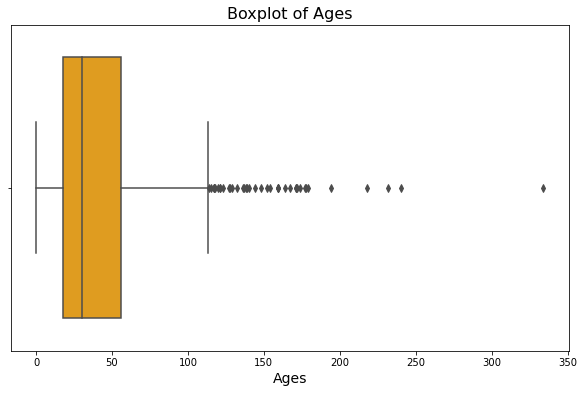

In [713]:
## Creating a box plot to visualize the distribution of the 'Age' column

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'], color='orange')
plt.title('Boxplot of Ages', fontsize=16)
plt.xlabel('Ages', fontsize=14)
plt.show()


From the boxplot above, I can conclude that most of the ages fall between 15 to 60. Ages from 110 above can be counted as outliers

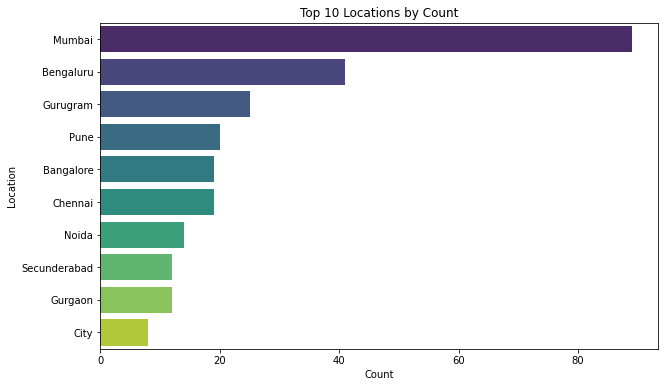

In [609]:
## Calculate the frequency of each company's Location

location_frequency = data['Location'].value_counts()

plt.figure(figsize=(10, 6))
top_locations = location_frequency.head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title('Top 10 LOCATION OF THE COMPANY')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


Mumbai has most compnay in the dataset, almost twice of others. Followed by Bengaluru and Gurugram

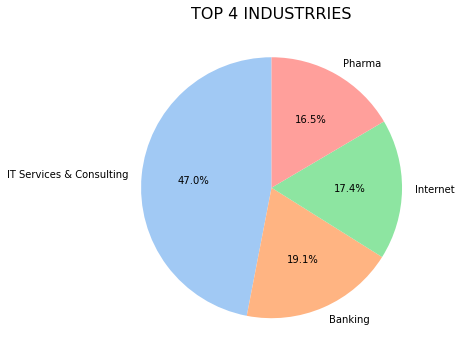

In [655]:
## Visualize the top 4 most common industry

plt.figure(figsize=(6, 6))

top_4_industries = data['Industry'].value_counts().head(4)

plt.pie(top_4_industries, 
        labels=top_4_industries.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel', len(top_4_industries)))

plt.title('TOP 4 INDUSTRRIES', fontsize=16)

plt.show()


These are the top 4 Industry category for the companies. From the datasets, almost half of the companies are into "IT Services & Consulting" . Pharma, Internet and Banking has almost the same percentage.

In [616]:
mean_age = data['Age'].mean()
median_age = data['Age'].median()
mode_age = data['Age'].mode()[0]

# Measures of dispersion
std_age = data['Age'].std()


# Print the results
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Mean Age: 46.82
Median Age: 30.0
Mode Age: 17.0
Standard Deviation of Age: 45.05705211020974
Variance of Age: 2030.137944862156
Range of Age: 334.0
IQR of Age: 38.25


In [633]:
data['Highly Rated'].value_counts()

Job Security                    154
Promotions / Appraisal           77
Skill Development / Learning     55
Company Culture                  39
Work Life Balance                37
Salary & Benefits                35
Name: Highly Rated, dtype: int64

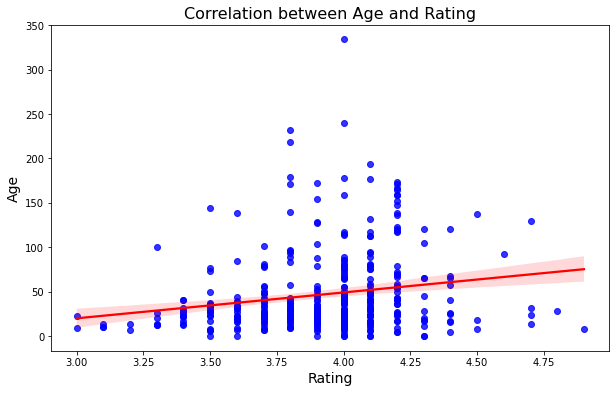

Correlation coefficient between Age and Rating: 0.19


In [663]:
# Scatter plot with regression line for Age and Rating

plt.figure(figsize=(10, 6))

sns.regplot(x='Rating', y='Age', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Correlation between Age and Rating', fontsize=16)

plt.xlabel('Rating', fontsize=14)

plt.ylabel('Age', fontsize=14)

plt.show()

# Calculate the correlation coefficient
correlation_coefficient = data[['Age', 'Rating']].corr().iloc[0, 1]

print(f"Correlation coefficient between Age and Rating: {correlation_coefficient:.2f}")


There is a positive correlation between Age and Rating although it is weak. While Rating might increase slightly with Age, other factors were likely considered in determining the Rating

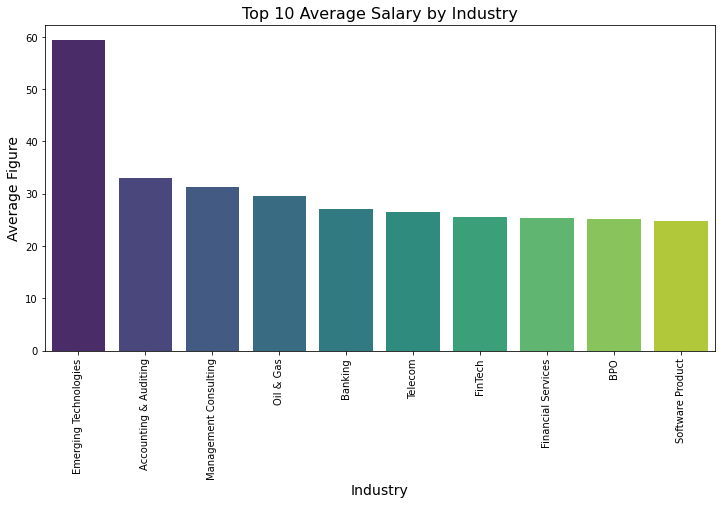

In [689]:
# Group by 'Industry' and calculate the mean of the 'Figure' column
grouped_data = data.groupby('Industry')['Figure'].mean().sort_values(ascending=False)

# Get the top 10 industries
top_10_industries = grouped_data.head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_10_industries.index, y=top_10_industries.values, palette='viridis')

# Adding title and labels
plt.title('Top 10 Average Salary by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Figure', fontsize=14)
plt.xticks(rotation=90) 
plt.show()


The bar plot illustrates the variations between industries with their average Salaries, decreasing as we move from the top industry(Emerging Technologies) to the tenth(Software Product ). This visualization is helpful for identifying which industries have the highest Salary and gaining insight into the distribution of figures across

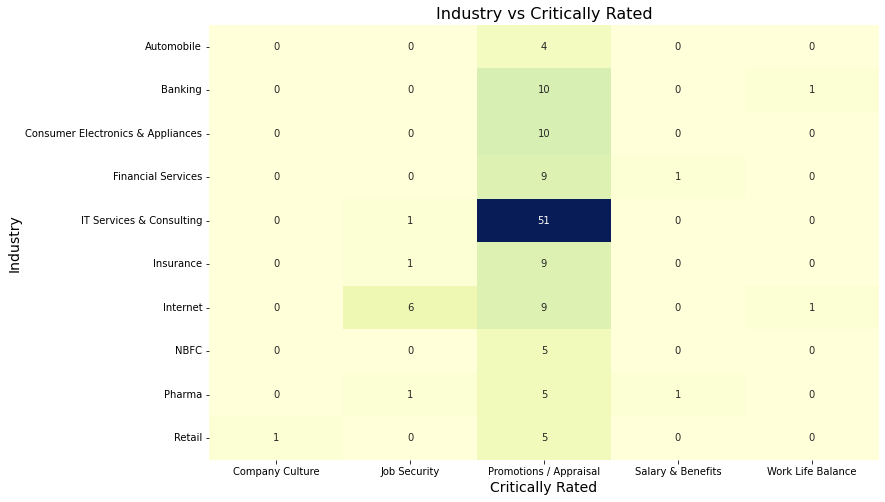

In [712]:
# Create a heatmap for Industry and Criticaly rated columns

top_10_industries = data['Industry'].value_counts().head(10).index
filtered_data = data[data['Industry'].isin(top_10_industries)]
contingency_table = pd.crosstab(filtered_data['Industry'], filtered_data['Critically Rated'])

# Step 3: Visualize the contingency table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Industry vs Critically Rated', fontsize=16)
plt.xlabel('Critically Rated', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.show()


Generally, promotion/Appraisal is critically rated for most company compared to other comapany issues. From the heat map the Industry(IT Services & Consulting) is the most critically rated for promotion/Appraisal 

## CONCLUSION

This dataset offers valuable insights into the business landscape in terms of company distribution by location and industry, as well as age and salary trends. While there is a weak correlation between Age and Rating, other factors are likely influencing the ratings. The industry distribution suggests that IT Services & Consulting dominates the dataset,but they also top the chart as the critically rated company for Promotion/Appraisal and companies in Emerging Technologies tend to offer higher salaries compared to other industries.